# Runge phenomenon with Elisee

In [521]:
# importation of modules 
import matplotlib.pyplot as plt 
import numpy as np 

In [522]:
class polynomial : 
    def __init__(self, T : list) -> None:
        self.tab_coef = np.array(T) # It is the array of coefficients of the polynomial
        self.degre = len(T)-1    # It is the degre of the polynomial
    
    def eval(self, x : float )-> float:
        """
        This function return the value of the polynomial at the point x.
        We use the Horner algorithm.
        """
        y = self.tab_coef[self.degre]
        for i in range(self.degre, 0, -1) : 
            y = self.tab_coef[i-1] + x*y 
        return y 
    def plot(self, X=np.linspace(-10,10,50), name="polynomial")-> None : 
        """
        This function plots the polynomial function.
        """
        Y = self.eval(X)
        plt.plot(X, Y, label=name) 
        plt.grid()
        plt.xlabel("axe x")
        plt.ylabel("axe y")
        plt.legend()
    

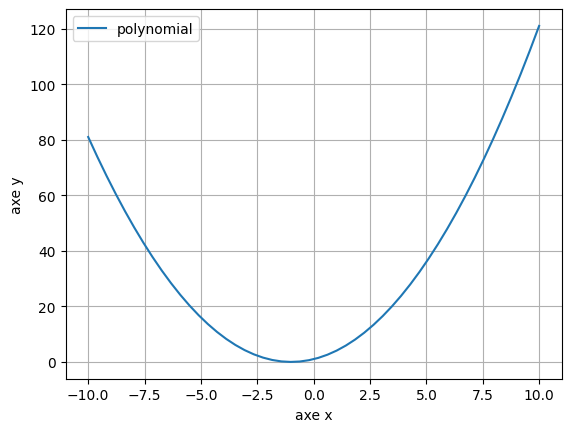

In [523]:
# example 
T = [1,2,1]
P = polynomial(T)
P.plot()
plt.show()

In [524]:
def differences_divisees(tab_inter_pts, tab_inter_val) : 
    """
    This function return the Lagrange's interpolation polynomial of a function f 
    with the interpolation points in the array tab_inter_pts.
    """
    # we have to calculate the differences divisees 
    n = len(tab_inter_pts)-1

    DiffDiv = np.zeros(n+1) 

    for i in range(n+1) : 
        DiffDiv[i] = tab_inter_val[i]
    
    for j in range(1,n+1) : 
        for i in range(n, j-1, -1) : 
            DiffDiv[i] = (DiffDiv[i] - DiffDiv[i-1]) / (tab_inter_pts[i] - tab_inter_pts[i-j]) 
    
    return polynomial(DiffDiv) 


On a : 
$$\forall i = 0(1)n : \, \ell_i(x) = \prod_{j\not = i}\dfrac{x-x_j}{x_i-x_j}$$
et : 
$$P(x) = (pL_{x_0, \dots, x_n}f)(x)=f(x_0)\ell_0(x) + f(x_1)\ell_1(x) + \dots + f(x_n)\ell_n(x)$$

In [525]:
def Lagrange_interpolation(X, Y, x : float) -> float :  
    """ 
    This function calculate at x the value of the Lagrange's interpolation polynomial 
    at the points of X with the values of each of them in Y
    """
    n = len(X)-1 #nb of interpolations pts = n+1 

    y=0
    for i in range(n+1) : 
        aux = 1
        for j in range(n+1) :
            if j != i : 
                aux *= (x-X[j])/(X[i]-X[j]) 
        y += Y[i]*aux 
    return y

    

In [526]:
def Runge_phenomenon(f, min : float, max : float, Nmax=10, name="f(x)=1/(1+8x²)") : 
    A = np.linspace(min, max, 500)
    B = f(A)
    plt.plot(A, B,label=name, linestyle='', marker='.', markersize=1)

    for n in range(10, Nmax+1, 2) :
        X = np.linspace(min, max, n)
        Y = f(X)
        for i, a in enumerate(A) : 
            B[i] = Lagrange_interpolation(X, Y, a)
        plt.plot(A, B, linestyle='', marker='.', markersize=1)
    plt.legend()
    plt.title("Runge Phenomenon")
    plt.show()

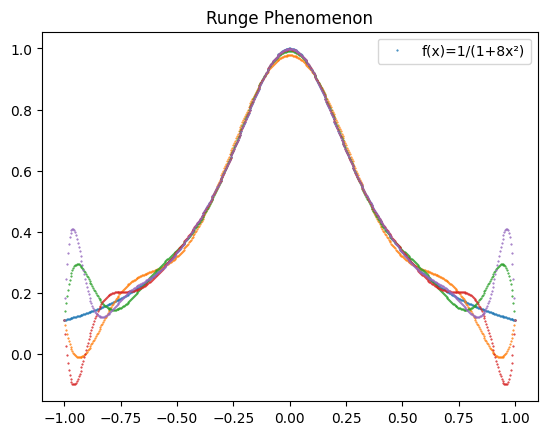

In [527]:
# example 
f = lambda x : 1/(1+8*x*x) 

Runge_phenomenon(f, -1, 1, 16)